<h1>Pandas and Timeseries data</h1>

<h2>Yahoo finance</h2>
<li><span style="color:blue">yfinance</span> is a python library that gets financial data from yahoo finance</li>
<li><a href="https://pypi.org/project/yfinance/">documentation</a></li>


In [7]:
#!pip install yfinance --upgrade
!pip install -i https://pypi.anaconda.org/ranaroussi/simple yfinance

Looking in indexes: https://pypi.anaconda.org/ranaroussi/simple
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=fbea7a94e9ad2fc5f79093a09aa5d357467b7e20cb9813df9f29aa2a93c9c8e3
  Stored in directory: /Users/joshuagrajales/Library/Caches/pip/wheels/1d/c6/a4/67f1aeb5c4e6cbef512e0bdb1c4e4006f69a381f417e0e246f
Successfully built yfinance


In [1]:
import yfinance as yf

yf.__version__

'0.1.63'

<h3>Example</h3>
<li>Get daily prices for IBM from January 2000 to end August 2023</li>

In [2]:
import yfinance as yf

# giving the start and end dates
startDate = '2000-01-01'
endDate = '2023-09-01'

# setting the ticker value
ticker = 'IBM'

# downloading the data of the ticker value between
# the start and end dates
df = yf.download(ticker, startDate, endDate)

df.info()

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5954 entries, 2000-01-03 to 2023-08-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5954 non-null   float64
 1   High       5954 non-null   float64
 2   Low        5954 non-null   float64
 3   Close      5954 non-null   float64
 4   Adj Close  5954 non-null   float64
 5   Volume     5954 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 325.6 KB



<h2><b>datetime</b>: Python library for reasoning about time</h2>
<li><b>datetime.datetime</b>: functions and objects for time (date+time)</li>
<li><b>datetime.date</b>: functions and objects for date (not time, days only)</li>
<li><b>datetime.timedelta</b>: functions and objects for time differences</li>
<li>The function <b>datetime.datetime.strptime</b> converts a text string into a datetime object</li>
<li>The function <b>datetime.datetime.strftime</b> converts a datetime object into an appropriately formatted text string (formatted printing, saving to a file)</li>

In [10]:
import datetime
today = datetime.date(2023,2,7) #datetime.date object
yesterday = datetime.date(2023,1,30) #datetime.date object
diff = today - yesterday #datetime.timedelta object
print(today,yesterday,diff)
print(type(diff))
print(type(today))

2023-02-07 2023-01-30 8 days, 0:00:00
<class 'datetime.timedelta'>
<class 'datetime.date'>


In [11]:
now = datetime.datetime.now() #datetime.datetime object
then = datetime.datetime(2000,1,1,0,0,0) #datetime.datetime object
diff = now - then #datetime.timedelta object
print(now, then, diff)

2023-09-20 15:29:15.763815 2000-01-01 00:00:00 8663 days, 15:29:15.763815


<h3>strptime and strftime</h3>
<li>strptime and strftime handle conversions between datetime objects and locale (the standard used in your locale) formats</li>
<li>Useful when you read time from a file as a string and need to convert it into a datatime object (or vice versa)</li>
<li>See https://pubs.opengroup.org/onlinepubs/9699919799/ (search for strptime) for formats</li>


In [12]:
start_time = "01/01/2000 10:26:44 PM"
end_time = "Monday, Sep 26 2024 15:25:21"
dt_start_time = datetime.datetime.strptime(start_time,"%m/%d/%Y %I:%M:%S %p")
dt_end_time = datetime.datetime.strptime(end_time,"%A, %b %d %Y %H:%M:%S")
time_to_completion = dt_end_time - dt_start_time
europe_end_time = datetime.datetime.strftime(dt_end_time,"%d/%m/%Y %H:%M:%S")
print(dt_start_time)
print(dt_end_time)
print(time_to_completion)
print(europe_end_time)

2000-01-01 22:26:44
2024-09-26 15:25:21
9034 days, 16:58:37
26/09/2024 15:25:21


<h2>Timeseries data in Pandas</h2>
<li>DataFrames can be organized for timeseries data</li>
<li>Typically, the index is time and the columns are the data objects</li>
<li>The index may be a simple ordering or may contain time enabled data (DatetimeIndex in Pandas)</li>
<li>yfinance returns an index in DatetimeIndex format</li>

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5954 entries, 2000-01-03 to 2023-08-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5954 non-null   float64
 1   High       5954 non-null   float64
 2   Low        5954 non-null   float64
 3   Close      5954 non-null   float64
 4   Adj Close  5954 non-null   float64
 5   Volume     5954 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 325.6 KB


<h3>Working with a timeseries data frame</h3>
<li>The data is organized with time as an index</li>
<li>And <span style="color:blue">time based</span> reasoning is possible</li>


In [14]:
#Get me the data for August 2010
df.loc["August 2010"]


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-08-02,123.565964,125.430206,123.565964,125.009560,78.090385,6733625
2010-08-03,124.311661,125.277245,123.642448,124.636711,77.857475,5326023
2010-08-04,124.722755,125.717018,124.139580,125.497131,78.394989,4777605
2010-08-05,124.980881,126.175911,124.789673,126.032501,78.729401,4728548
2010-08-06,124.674950,124.741875,123.097511,124.416824,78.105209,6418465
2010-08-09,125.038239,126.520073,124.665390,126.195030,79.221535,6413758
2010-08-10,125.411087,126.663483,125.019119,126.042068,79.125519,5723398
2010-08-11,124.942642,124.942642,123.766731,124.120461,77.919182,6606641
2010-08-12,122.074570,123.116638,121.912048,122.657745,77.000916,5368281


<h4>Calculate percent changes</h4>
<li>The function pct_change computes a percent change between successive rows (times in  timeseries data)
<li>Defaults to a single time delta
<li>With an argument, the time delta can be changed
<li>provides nan support
<li><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html">https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html</a>

In [15]:
p_change = df['Adj Close'].pct_change() #One timeperiod percent change
p_change

Date
2000-01-03         NaN
2000-01-04   -0.033944
2000-01-05    0.035136
2000-01-06   -0.017241
2000-01-07   -0.004385
                ...   
2023-08-25    0.012539
2023-08-28    0.004610
2023-08-29    0.002945
2023-08-30    0.002800
2023-08-31   -0.000204
Name: Adj Close, Length: 5954, dtype: float64

In [16]:
pct_chg_2 = df["Adj Close"].pct_change(2) #two time period (t(i) - t(i-2))/t(i-2)
pct_chg_2

Date
2000-01-03         NaN
2000-01-04         NaN
2000-01-05    0.000000
2000-01-06    0.017289
2000-01-07   -0.021551
                ...   
2023-08-25    0.013528
2023-08-28    0.017207
2023-08-29    0.007568
2023-08-30    0.005753
2023-08-31    0.002595
Name: Adj Close, Length: 5954, dtype: float64

<li>Time enabled reasoning lets us reason about different segments of time</li>
<li>The function <span style="color:blue">resample</span> changes the time frame</li>
<li><a href="https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases">resampling offset guide</a></li>

In [17]:
#Get the average adjClose for each month that IBM has traded since 2000
df["Adj Close"].resample("M").mean()

Date
2000-01-31     62.153879
2000-02-29     60.295900
2000-03-31     59.400927
2000-04-30     60.800341
2000-05-31     57.409090
                 ...    
2023-04-30    125.090952
2023-05-31    123.229955
2023-06-30    132.396411
2023-07-31    135.124515
2023-08-31    143.303988
Freq: M, Name: Adj Close, Length: 284, dtype: float64

In [18]:
#Month by month averages
#Collects daily data for each month and computes the mean daily change for that month
print("Mean daily pct chnge each month: \n",p_change.resample('M').mean()*100.0)

Mean daily pct chnge each month: 
 Date
2000-01-31   -0.149178
2000-02-29   -0.411233
2000-03-31    0.656123
2000-04-30   -0.261357
2000-05-31   -0.141530
                ...   
2023-04-30   -0.189233
2023-05-31    0.143978
2023-06-30    0.195450
2023-07-31    0.377033
2023-08-31    0.131236
Freq: M, Name: Adj Close, Length: 284, dtype: float64


In [19]:
#Yearly
#Collects daily data for each year and computes the mean daily change for that year

print("Mean daily percent change for each year:\n",p_change.resample('Y').mean()*100.0)

Mean daily percent change for each year:
 Date
2000-12-31   -0.076971
2001-12-31    0.172009
2002-12-31   -0.137905
2003-12-31    0.084829
2004-12-31    0.031867
2005-12-31   -0.062100
2006-12-31    0.075882
2007-12-31    0.056433
2008-12-31   -0.066384
2009-12-31    0.198436
2010-12-31    0.059158
2011-12-31    0.106091
2012-12-31    0.028180
2013-12-31    0.006292
2014-12-31   -0.046587
2015-12-31   -0.039209
2016-12-31    0.097013
2017-12-31   -0.011406
2018-12-31   -0.089686
2019-12-31    0.092369
2020-12-31    0.028602
2021-12-31    0.071725
2022-12-31    0.051501
2023-12-31    0.051987
Freq: A-DEC, Name: Adj Close, dtype: float64


In [20]:
#Quarterly
print("Mean daily percent change for each quarter:\n",p_change.resample('Q').mean())

Mean daily percent change for each quarter:
 Date
2000-03-31    0.000650
2000-06-30   -0.000790
2000-09-30    0.000689
2000-12-31   -0.003605
2001-03-31    0.002591
                ...   
2022-09-30   -0.002413
2022-12-31    0.003021
2023-03-31   -0.000896
2023-06-30    0.000593
2023-09-30    0.002456
Freq: Q-DEC, Name: Adj Close, Length: 95, dtype: float64


In [21]:
#Get the month end prices BM = Business Month End (similarly BQ/BY)
#last returns the last quoted price for the business month
#Alternatives to last: first, max, min, sum, mean

df["Adj Close"].resample('BM',).apply({'Adj Close':'last'})

,Adj Close
Date,
2000-01-31,59.723042
2000-02-29,54.726089
2000-03-31,63.048153
2000-04-28,59.386463
2000-05-31,57.225082
...,...
2023-04-28,123.290710
2023-05-31,127.127045
2023-06-30,132.287659


<h3>shift a series n-time periods</h3>
<li>shift the series forward by 1 day</li>
<li>and calculate the one day price change</li>

In [22]:
shifted_1 = df["Adj Close"].shift(1,freq='D')
shifted_1 - df["Adj Close"]

Date
2000-01-03         NaN
2000-01-04    2.094940
2000-01-05   -2.094940
2000-01-06    1.064110
2000-01-07    0.265976
                ...   
2023-08-28         NaN
2023-08-29   -0.429993
2023-08-30   -0.410004
2023-08-31    0.029999
2023-09-01         NaN
Name: Adj Close, Length: 7244, dtype: float64

<li>A <span style="color:blue">DatetimeIndex</span> dataframe automatically treats the index as time on the x-axis</li>
<li>Super useful for plotting data</li>

In [23]:
p_change.resample('Y').sum()

Date
2000-12-31   -0.193198
2001-12-31    0.426583
2002-12-31   -0.347519
2003-12-31    0.213768
2004-12-31    0.080306
2005-12-31   -0.156492
2006-12-31    0.190463
2007-12-31    0.141646
2008-12-31   -0.167951
2009-12-31    0.500058
2010-12-31    0.149077
2011-12-31    0.267349
2012-12-31    0.070451
2013-12-31    0.015856
2014-12-31   -0.117400
2015-12-31   -0.098807
2016-12-31    0.244473
2017-12-31   -0.028629
2018-12-31   -0.225112
2019-12-31    0.232769
2020-12-31    0.072364
2021-12-31    0.180747
2022-12-31    0.129267
2023-12-31    0.086818
Freq: A-DEC, Name: Adj Close, dtype: float64

<Axes: xlabel='Date'>

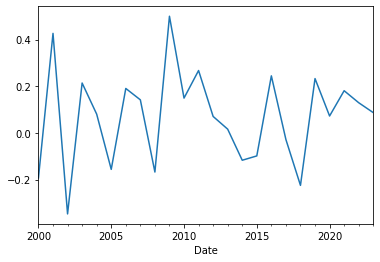

In [24]:
p_change.resample('Y').sum().plot()

In [25]:
#Nan's are ignored by aggregate functions
n=13
df["Adj Close"].pct_change(n).mean()

0.0034428978282247734

In [26]:
df["Adj Close"].pct_change(n)

Date
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
                ...   
2023-08-25    0.007626
2023-08-28    0.024774
2023-08-29    0.022339
2023-08-30    0.026132
2023-08-31    0.034670
Name: Adj Close, Length: 5954, dtype: float64

<h3>Rolling windows</h3>
<li>"rolling" function extracts rolling windows
<li>For example, the 21 period rolling window of the 13 period percent change 

In [27]:
df["Adj Close"].pct_change(1)

Date
2000-01-03         NaN
2000-01-04   -0.033944
2000-01-05    0.035136
2000-01-06   -0.017241
2000-01-07   -0.004385
                ...   
2023-08-25    0.012539
2023-08-28    0.004610
2023-08-29    0.002945
2023-08-30    0.002800
2023-08-31   -0.000204
Name: Adj Close, Length: 5954, dtype: float64

In [28]:
n=3
df["Adj Close"].pct_change().rolling(n)

Rolling [window=3,center=False,axis=0,method=single]

<h4>Calculate something on the rolling windows (local averages)</h4>

<h4>Example: mean (the 3 day moving average of the 1 day percent change)

In [29]:
n=3
df["Adj Close"].pct_change().rolling(n).mean()

Date
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06   -0.005350
2000-01-07    0.004503
                ...   
2023-08-25    0.009028
2023-08-28    0.006042
2023-08-29    0.006698
2023-08-30    0.003451
2023-08-31    0.001847
Name: Adj Close, Length: 5954, dtype: float64

<h4>Or the 21 day moving average on the 5 day percent change</h4>

In [30]:
df["Adj Close"].pct_change(5).rolling(21).mean()

Date
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
                ...   
2023-08-25    0.007322
2023-08-28    0.007028
2023-08-29    0.007114
2023-08-30    0.007241
2023-08-31    0.007283
Name: Adj Close, Length: 5954, dtype: float64

<h4>Calculate several moving averages and graph them</h4>

In [31]:
n=1
ma_8 = df["Adj Close"].pct_change(n).rolling(window=8).mean()
ma_13= df["Adj Close"].pct_change(n).rolling(window=13).mean()
ma_21= df["Adj Close"].pct_change(n).rolling(window=21).mean()
ma_34= df["Adj Close"].pct_change(n).rolling(window=34).mean()
ma_55= df["Adj Close"].pct_change(n).rolling(window=55).mean()

<Axes: xlabel='Date'>

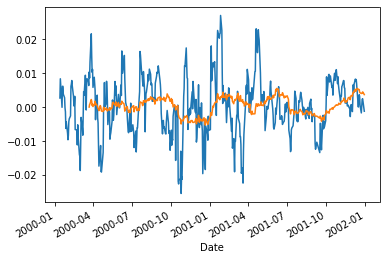

In [32]:
ma_8[1:500].plot()
ma_55[1:500].plot()

<Axes: xlabel='Date'>

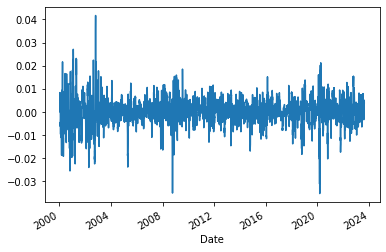

In [33]:
ma_8.plot()

<h3>Numpy style boolean masks work in pandas</h3>

In [34]:
ma_8 > 0.001

Date
2000-01-03    False
2000-01-04    False
2000-01-05    False
2000-01-06    False
2000-01-07    False
              ...  
2023-08-25     True
2023-08-28     True
2023-08-29     True
2023-08-30     True
2023-08-31     True
Name: Adj Close, Length: 5954, dtype: bool

In [35]:
ma_8 > ma_13

Date
2000-01-03    False
2000-01-04    False
2000-01-05    False
2000-01-06    False
2000-01-07    False
              ...  
2023-08-25     True
2023-08-28     True
2023-08-29     True
2023-08-30     True
2023-08-31     True
Name: Adj Close, Length: 5954, dtype: bool

In [36]:
ma_13[ma_8 > ma_13].mean()

0.0003719797785914168

<h3>A simple trading mean reversal trading strategy</h3>
<b>Don't try this at home!</b>
<li>If the stock goes up more than .5% on day 1, it will go down on day 2</li>
<li>What is the expected return from this strategy</li>

In [37]:
up_days = df["Adj Close"].pct_change() > 0.005  #Create the boolean mask
trade_days = up_days.shift(1,fill_value=False)  #Replace NaNs by False
df["Adj Close"].pct_change()[trade_days].mean() #Apply the mask and get mean

-0.00030681206821519044

<h1>Quick analysis</h1>
<h2>Linear regression with pandas</h2>
<li>Example: TAN is the ticker for a solar ETF. FSLR, NEP, and SPWR are tickers of companies that build or lease solar panels. Each has a different business model. We'll use pandas to study the risk reward tradeoff between the 4 investments and also see how correlated they are</li>


In [38]:
import yfinance as yf

# giving the start and end dates
startDate = '2015-07-01'
endDate = '2023-09-01'

# setting the ticker value
ticker_list = ['FSLR', 'TAN','NEP','SPWR']

# downloading the data of the ticker value between
# the start and end dates
df = yf.download(ticker_list, startDate, endDate)

df.info()

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/Users/joshuagrajales/opt/anaconda3/lib/python3.9/threading.py", line 973, in _bootstrap_inner
Exception in thread Thread-8:
Exception in thread Traceback (most recent call last):
  File "/Users/joshuagrajales/opt/anaconda3/lib/python3.9/threading.py", line 973, in _bootstrap_inner
Thread-7:
Traceback (most recent call last):
  File "/Users/joshuagrajales/opt/anaconda3/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/Users/joshuagrajales/opt/anaconda3/lib/python3.9/threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/joshuagrajales/opt/anaconda3/lib/python3.9/site-packages/multitasking/__init__.py", line 104, in _run_via_pool
    self.run()
  File "/Users/joshuagrajales/opt/anaconda3/lib/python3.9/threading.py", line 910, in run
    self.run()
  File "/Users/joshuagrajales/opt/anaconda3/lib/python3.9/threading.py", line 910, in run
    retur

KeyboardInterrupt: 

In [ ]:
df["Adj Close"]

In [ ]:
solar_df = df["Adj Close"]


<h4>Let's calculate returns (the 1 day percent change)</h4>

In [ ]:
rets = solar_df.pct_change()
print(rets)

<h4>Let's visualize the relationship between each stock and the ETF</h4>

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(rets.FSLR,rets.TAN)

In [ ]:
plt.scatter(rets.NEP,rets.TAN)

In [ ]:
plt.scatter(rets.SPWR,rets.TAN)

<h4>The correlation matrix</h4>

In [ ]:
solar_corr = rets.corr()
print(solar_corr)

<h3>Basic risk analysis</h3>
<h4>We'll plot the mean and std or returns for each ticker to get a sense of the risk return profile</h4>
<li>And add labels and formatting to each (mean,std) pair for readability</li>
<li>See <a href="https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.annotate.html">matplotlib annotate</a></li>

In [ ]:
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Standard deviations')


In [ ]:
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Standard deviations')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,                                                        #annotation text
        xy = (x, y),                                                  #point being annotated
        xytext = (20, -30),
        textcoords = 'offset points',                                 #text coord fmt (offset points from xy)
        ha = 'right',                                                 #horizontal alignment
        va = 'bottom',                                                #vertical alignment
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),  #A yellow box around the text
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')) #arrow to the box
plt.show()


<h2>Regressions</h2>
<li><a href="https://www.statsmodels.org/stable/api.html">statsmodels</a> is a python library for estimating different statistical models</li>
<li>We'll use the <a href="https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS">OLS</a> package to run a linear regression with daily returns on the ETF as the dependent variable and daily returns on the component stocks as independent variables</li> 


<h3>Steps for regression</h3>
<li>Construct y (dependent variable series)
<li>Construct matrix (dataframe) of X (independent variable series)
<li>Add intercept
<li>Model the regression
<li>Get the results
<h3>The statsmodels library contains various regression packages. We'll use the OLS (Ordinary Least Squares) model

In [ ]:
rets = solar_df.pct_change()
rets

In [ ]:
import statsmodels
statsmodels.__version__

In [ ]:
!pip install statsmodels --upgrade

In [ ]:
import numpy as np
import statsmodels.api as sm
X=rets[['FSLR','NEP','SPWR']] #The independent variables data
X = sm.add_constant(X) #Add a constant (alpha)
y=rets['TAN'] #The dependent variable
model = sm.OLS(y,X,missing='drop') #Build the model (drop missing values)
result = model.fit() #fit the data to the model
print(result.summary()) #Print the results

<h4>If we want, plot the fitted line with the actual y values

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(y[:100])
ax.plot(result.fittedvalues[:100])